In [ ]:
# Module to import
import pandas as pd
import os
import numpy as np
import glob
import re
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, SplineTransformer, PowerTransformer,  FunctionTransformer
from itertools import product
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
# Change directory
os.chdir("homework")

In [ ]:
os.listdir('data')

['NEGEDIA_56_unique_counts.tsv',
 'NEGEDIA_73_unique_counts.tsv',
 'NEGEDIA_71_unique_counts.tsv',
 'NEGEDIA_10_unique_counts.tsv',
 'NEGEDIA_43_unique_counts.tsv',
 'NEGEDIA_40_unique_counts.tsv',
 'NEGEDIA_12_unique_counts.tsv',
 'NEGEDIA_11_unique_counts.tsv',
 'NEGEDIA_55_unique_counts.tsv',
 'NEGEDIA_29_unique_counts.tsv',
 'NEGEDIA_23_unique_counts.tsv',
 'NEGEDIA_92_unique_counts.tsv',
 'NEGEDIA_27_unique_counts.tsv',
 'NEGEDIA_14_unique_counts.tsv',
 'NEGEDIA_13_unique_counts.tsv',
 'NEGEDIA_58_unique_counts.tsv',
 'NEGEDIA_41_unique_counts.tsv',
 'NEGEDIA_52_unique_counts.tsv',
 'NEGEDIA_67_unique_counts.tsv',
 'NEGEDIA_79_unique_counts.tsv',
 'NEGEDIA_26_unique_counts.tsv',
 'NEGEDIA_2_unique_counts.tsv',
 'NEGEDIA_36_unique_counts.tsv',
 'NEGEDIA_83_unique_counts.tsv',
 'NEGEDIA_8_unique_counts.tsv',
 'NEGEDIA_90_unique_counts.tsv',
 'NEGEDIA_77_unique_counts.tsv',
 'NEGEDIA_32_unique_counts.tsv',
 'NEGEDIA_5_unique_counts.tsv',
 'NEGEDIA_74_unique_counts.tsv',
 'NEGEDIA_45_

In [ ]:
# Open one of this file and view it
negedia_df = pd.read_csv('data/NEGEDIA_29_unique_counts.tsv', sep='\t')
negedia_df

,GeneID,NEGEDIA_29
0,__no_feature,3601766
1,__alignment_not_unique,815285
2,ENSG00000251562,84514
3,ENSG00000108821,50689
4,ENSG00000198886,47195
...,...,...
33694,ENSG00000283117,0
33695,ENSG00000283118,0
33696,ENSG00000283125,0
33697,__too_low_aQual,0


In [ ]:
# Clear data (take only genes with counts > 10)
negedia_df = negedia_df[negedia_df['NEGEDIA_29'] > 10]
negedia_df

,GeneID,NEGEDIA_29
0,__no_feature,3601766
1,__alignment_not_unique,815285
2,ENSG00000251562,84514
3,ENSG00000108821,50689
4,ENSG00000198886,47195
...,...,...
11599,ENSG00000273456,11
11600,ENSG00000276289,11
11601,ENSG00000277013,11
11602,ENSG00000278023,11


In [ ]:
# We can now exploit the structure of this file for doing the merge. But first, check for duplicate genes.
gene_counter = Counter()

for filename in glob.glob('data/NEGEDIA_*_unique_counts.tsv'):
    with open(filename, 'r') as file:
        next(file)  # Skip GeneId and NEGEDIA_XX
        for line in file:
            gene_id = line.split('\t')[0]  # Assuming 'Gene Id' is the first column
            gene_counter[gene_id] += 1

{k: c for k, c in gene_counter.items() if c != 55} # It means ALL the genes are shared between the "campioni"

{}

In [ ]:
# Now this makes it possible to understand that the "NEGEDIA_xx" represents the count for that "campione". We can get an unique dataframe having the count for each "campione".

In [ ]:
# We can now exploit the structure of this file for doing the merge. But first, check for duplicate genes.
dataframes = []

for filename in glob.glob('data/NEGEDIA_*_unique_counts.tsv'):
    # Consider the column name
    column_name = re.search(r"NEGEDIA_\d+", filename).group(0) # Assuming all the namings are ok
    # Read the gene file into a DataFrame
    negedia_df = pd.read_csv(filename, sep='\t')
    # Filter it
    negedia_df = negedia_df[negedia_df[column_name] > 10]
    # Drop
    # Set GeneID = index
    negedia_df.set_index('GeneID', inplace=True)
    # Store the DataFrame in the dictionary with the filename as key
    dataframes.append(negedia_df)

negedia_df = pd.concat(dataframes, axis=1)
# If NaN, it means it's not expressive for that "campione"
negedia_df.fillna(0, inplace=True)
negedia_df

,NEGEDIA_56,NEGEDIA_73,NEGEDIA_71,NEGEDIA_10,NEGEDIA_43,NEGEDIA_40,NEGEDIA_12,NEGEDIA_11,NEGEDIA_55,NEGEDIA_29,...,NEGEDIA_57,NEGEDIA_91,NEGEDIA_39,NEGEDIA_48,NEGEDIA_38,NEGEDIA_24,NEGEDIA_19,NEGEDIA_93,NEGEDIA_17,NEGEDIA_20
GeneID,,,,,,,,,,,,,,,,,,,,,
__no_feature,3748351.0,2825531.0,3538049.0,3605316.0,3991453.0,3722616.0,3669190.0,3484583.0,3804006.0,3601766.0,...,3366787.0,3239680.0,3204333.0,3859561.0,3440523.0,3619365.0,3897786.0,3541808.0,3133616.0,3971446.0
__alignment_not_unique,812320.0,777152.0,894680.0,744510.0,898402.0,749302.0,764079.0,980091.0,806014.0,815285.0,...,808094.0,798991.0,782224.0,834657.0,881044.0,731628.0,807463.0,847259.0,860184.0,820276.0
ENSG00000251562,55187.0,34883.0,51715.0,32494.0,41204.0,156285.0,58876.0,68222.0,71038.0,84514.0,...,15996.0,81962.0,74495.0,68455.0,61595.0,28308.0,55468.0,85852.0,19467.0,41242.0
__ambiguous,39433.0,46065.0,44640.0,38055.0,39320.0,33707.0,47093.0,57492.0,39497.0,42084.0,...,73675.0,42547.0,53552.0,29514.0,48272.0,36490.0,42779.0,37442.0,55551.0,42587.0
ENSG00000108821,36683.0,50426.0,21176.0,23175.0,7421.0,4846.0,22644.0,31305.0,2138.0,50689.0,...,7668.0,12396.0,19550.0,21352.0,20429.0,9652.0,35166.0,20556.0,11987.0,10719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000258651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
ENSG00000185198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
ENSG00000249231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [ ]:
# Drop non-informative genes
print([ind for ind in negedia_df.index if ind.startswith('__')])
negedia_df.drop(index=[ind for ind in negedia_df.index if ind.startswith('__')], inplace=True)

['__no_feature', '__alignment_not_unique', '__ambiguous']


In [ ]:
# Rotate the dataframe, so that "genes" are the features and the "campioni" are the samples
negedia_df = negedia_df.transpose()

In [ ]:
negedia_df.columns

Index(['ENSG00000251562', 'ENSG00000108821', 'ENSG00000198886',
       'ENSG00000198938', 'ENSG00000106211', 'ENSG00000198763',
       'ENSG00000142156', 'ENSG00000198899', 'ENSG00000198840',
       'ENSG00000245532',
       ...
       'ENSG00000270755', 'ENSG00000274859', 'ENSG00000229873',
       'ENSG00000255026', 'ENSG00000245281', 'ENSG00000258651',
       'ENSG00000185198', 'ENSG00000249231', 'ENSG00000254239',
       'ENSG00000263089'],
      dtype='object', name='GeneID', length=20867)

<Axes: ylabel='Density'>

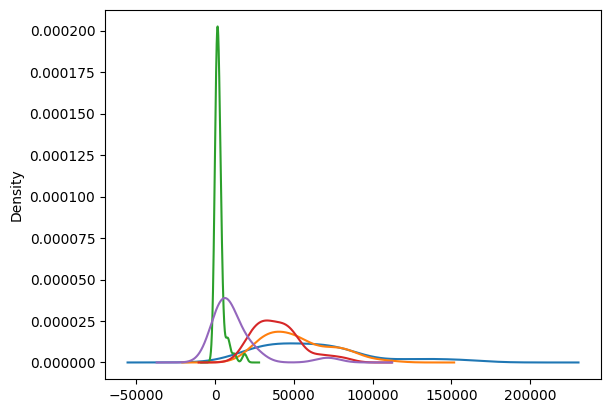

In [ ]:
# Plot the count for some features
negedia_df['ENSG00000251562'].plot(kind='kde')
negedia_df['ENSG00000198886'].plot(kind='kde')
negedia_df['ENSG00000169710'].plot(kind='kde')
negedia_df['ENSG00000198938'].plot(kind='kde')
negedia_df['ENSG00000111341'].plot(kind='kde')

# Distributions are skewed. Some follows a gaussian, but for example the green one is very skewed

<Axes: ylabel='Density'>

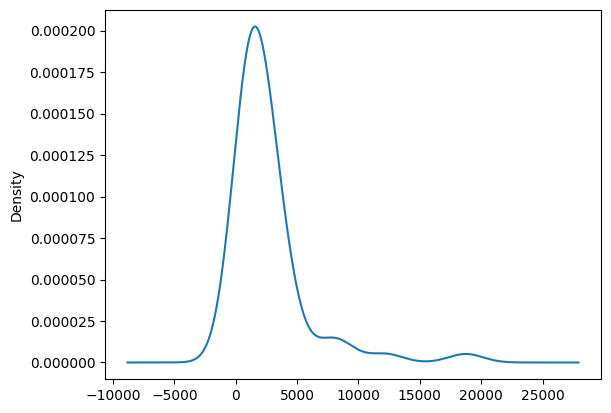

In [ ]:
negedia_df['ENSG00000169710'].plot(kind='kde')

In [ ]:
# Check a "resume" of the characteristic of each genome
negedia_df.describe()

GeneID,ENSG00000251562,ENSG00000108821,ENSG00000198886,ENSG00000198938,ENSG00000106211,ENSG00000198763,ENSG00000142156,ENSG00000198899,ENSG00000198840,ENSG00000245532,...,ENSG00000270755,ENSG00000274859,ENSG00000229873,ENSG00000255026,ENSG00000245281,ENSG00000258651,ENSG00000185198,ENSG00000249231,ENSG00000254239,ENSG00000263089
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.00000,55.00000,55.00000
mean,63231.472727,23511.109091,52678.781818,40272.545455,14381.490909,34065.454545,8923.527273,28102.20000,20627.490909,18499.418182,...,0.254545,0.254545,0.236364,0.236364,0.218182,0.218182,0.20000,0.20000,0.20000,0.20000
std,35326.672418,16083.994680,21033.361821,15139.488842,9523.959393,16632.404790,5275.990989,14541.90638,10464.493463,10009.933569,...,1.887760,1.887760,1.752920,1.752920,1.618080,1.618080,1.48324,1.48324,1.48324,1.48324
min,15996.000000,2138.000000,22327.000000,20194.000000,1286.000000,14181.000000,1693.000000,9501.00000,5644.000000,7908.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
25%,34237.000000,11277.000000,35151.000000,29563.500000,6457.000000,22346.000000,5334.500000,16992.00000,13824.500000,11006.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
50%,55468.000000,21176.000000,47195.000000,37844.000000,13777.000000,31373.000000,7404.000000,25844.00000,16869.000000,16114.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
75%,79694.500000,32256.000000,67957.500000,47262.000000,21369.500000,41422.000000,11773.000000,34935.00000,25599.500000,21332.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
max,159162.000000,79186.000000,108634.000000,81490.000000,42562.000000,105914.000000,28798.000000,75204.00000,54457.000000,57587.000000,...,14.000000,14.000000,13.000000,13.000000,12.000000,12.000000,11.00000,11.00000,11.00000,11.00000


In [ ]:
# It makes sense to normalise the data with a RobustScaler. Since different genes expresses different magnitudes, it makes sense to scale for diminishing the impact of outliers on the PCA
rs = RobustScaler()
rscaled_negedia_df = pd.DataFrame(rs.fit_transform(negedia_df), index=negedia_df.index, columns=negedia_df.columns)
rscaled_negedia_df

GeneID,ENSG00000251562,ENSG00000108821,ENSG00000198886,ENSG00000198938,ENSG00000106211,ENSG00000198763,ENSG00000142156,ENSG00000198899,ENSG00000198840,ENSG00000245532,...,ENSG00000270755,ENSG00000274859,ENSG00000229873,ENSG00000255026,ENSG00000245281,ENSG00000258651,ENSG00000185198,ENSG00000249231,ENSG00000254239,ENSG00000263089
NEGEDIA_56,-0.006182,0.739168,-0.324387,-0.983473,0.394769,-0.655588,1.328104,-0.573148,-0.164841,-0.205704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_73,-0.452841,1.394251,-0.516879,-0.340255,0.738173,-0.542934,1.992234,-0.593713,0.119236,-0.692945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_71,-0.082561,0.000000,0.262753,-0.520609,-0.451702,0.412351,-0.178768,0.168088,0.404076,-0.345262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_10,-0.505395,0.095286,0.869675,0.502585,-0.209422,0.507706,-0.058865,0.696929,0.891380,-0.791439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_43,-0.313788,-0.655656,-0.515782,-0.733791,-0.449690,-0.471640,-0.499495,-0.910829,-0.875839,-0.603167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_40,2.217830,-0.778397,0.136619,0.183631,1.585516,-0.451457,-0.887008,0.800145,-0.004756,0.392427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_12,0.074971,0.069975,-0.139119,-0.173009,0.902062,-0.377071,0.075483,-0.412640,0.006030,-0.163576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_11,0.280570,0.482816,1.872769,1.693703,-0.166102,3.907580,-0.218840,1.709413,1.458259,1.104256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_55,0.342518,-0.907479,0.852880,2.027403,0.652741,0.545869,-0.819911,1.221312,1.504459,1.605443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_29,0.638970,1.406788,0.000000,-0.050965,0.000000,0.181642,1.554555,0.427019,0.012824,1.632463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Density'>

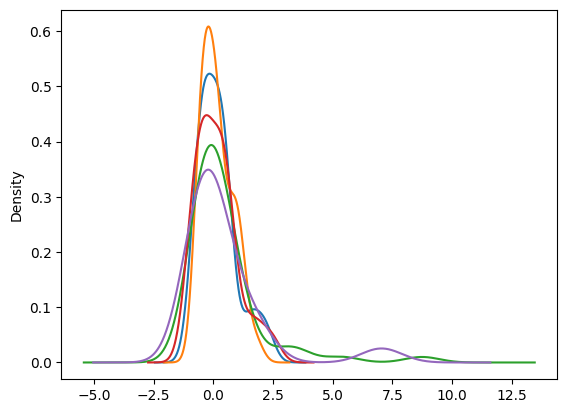

In [ ]:
# Plot the count for some features
rscaled_negedia_df['ENSG00000251562'].plot(kind='kde')
rscaled_negedia_df['ENSG00000198886'].plot(kind='kde')
rscaled_negedia_df['ENSG00000169710'].plot(kind='kde')
rscaled_negedia_df['ENSG00000198938'].plot(kind='kde')
rscaled_negedia_df['ENSG00000111341'].plot(kind='kde')

# Distributions are now very similar

In [ ]:
# Let's also consider a standard scaler, though we have some outliers so it may not be the best. However, one should try everything.
ss = StandardScaler()
scaled_negedia_df = pd.DataFrame(ss.fit_transform(negedia_df), index=negedia_df.index, columns=negedia_df.columns)
scaled_negedia_df

GeneID,ENSG00000251562,ENSG00000108821,ENSG00000198886,ENSG00000198938,ENSG00000106211,ENSG00000198763,ENSG00000142156,ENSG00000198899,ENSG00000198840,ENSG00000245532,...,ENSG00000270755,ENSG00000274859,ENSG00000229873,ENSG00000255026,ENSG00000245281,ENSG00000258651,ENSG00000185198,ENSG00000249231,ENSG00000254239,ENSG00000263089
NEGEDIA_56,-0.229816,0.826492,-0.773743,-1.322195,0.559767,-0.922208,1.345014,-0.870436,-0.549670,-0.454646,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_73,-0.809863,1.688819,-1.076747,-0.563324,1.102419,-0.791811,2.162947,-0.896045,-0.227072,-0.961880,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_71,-0.329004,-0.146520,0.150481,-0.776106,-0.777843,0.313919,-0.510831,0.052592,0.096395,-0.599930,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_10,-0.878112,-0.021090,1.105845,0.431062,-0.394988,0.424292,-0.363159,0.711134,0.649779,-1.064415,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_43,-0.629284,-1.009600,-1.075020,-1.027619,-0.774664,-0.709290,-0.905834,-1.290934,-1.357083,-0.868418,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_40,2.658365,-1.171173,-0.048067,0.054759,2.441407,-0.685929,-1.383090,0.839664,-0.367877,0.168027,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_12,-0.124428,-0.054408,-0.482110,-0.366006,1.361400,-0.599827,-0.197698,-0.670562,-0.355629,-0.410789,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_11,0.142570,0.489041,2.684827,1.836347,-0.326534,4.359608,-0.560183,1.971934,1.293529,0.909066,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_55,0.223018,-1.341091,1.079407,2.230048,0.967418,0.468465,-1.300455,1.364124,1.345994,1.430817,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083
NEGEDIA_29,0.608002,1.705322,-0.263121,-0.222018,-0.064056,0.046876,1.623907,0.375027,-0.347914,1.458946,...,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083,-0.136083


<Axes: ylabel='Density'>

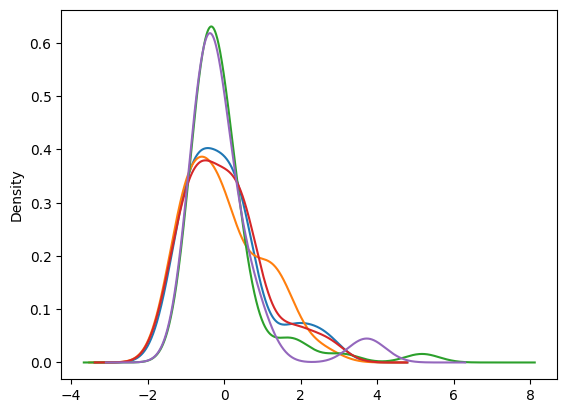

In [ ]:
# Plot the count for some features
scaled_negedia_df['ENSG00000251562'].plot(kind='kde')
scaled_negedia_df['ENSG00000198886'].plot(kind='kde')
scaled_negedia_df['ENSG00000169710'].plot(kind='kde')
scaled_negedia_df['ENSG00000198938'].plot(kind='kde')
scaled_negedia_df['ENSG00000111341'].plot(kind='kde')

# Distributions are now very similar

In [ ]:
# I will also try a quantile transformation
qt = QuantileTransformer(output_distribution='normal')
q_negedia_df = pd.DataFrame(qt.fit_transform(negedia_df), index=negedia_df.index, columns=negedia_df.columns)
q_negedia_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (55). n_quantiles is set to n_samples.
  warnings.warn(


GeneID,ENSG00000251562,ENSG00000108821,ENSG00000198886,ENSG00000198938,ENSG00000106211,ENSG00000198763,ENSG00000142156,ENSG00000198899,ENSG00000198840,ENSG00000245532,...,ENSG00000270755,ENSG00000274859,ENSG00000229873,ENSG00000255026,ENSG00000245281,ENSG00000258651,ENSG00000185198,ENSG00000249231,ENSG00000254239,ENSG00000263089
NEGEDIA_56,-0.092972,0.895780,-0.589456,-2.085356,0.535083,-1.128144,1.324958,-0.967422,-0.330873,-0.282216,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_73,-0.645631,1.446104,-1.220640,-0.380326,0.967422,-0.764710,2.085356,-1.044409,0.139710,-1.446104,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_71,-0.186756,0.000000,0.482248,-0.703922,-0.535083,0.482248,-0.282216,0.282216,0.430727,-0.430727,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_10,-0.828465,0.282216,0.967422,0.535083,-0.139710,0.645631,-0.092972,0.967422,0.703922,-2.085356,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_43,-0.535083,-1.044409,-1.128144,-1.128144,-0.482248,-0.645631,-1.044409,-5.199338,-2.085356,-1.044409,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_40,2.085356,-1.786156,0.092972,0.139710,2.085356,-0.535083,-5.199338,1.044409,-0.046436,0.482248,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_12,0.046436,0.186756,-0.330873,-0.186756,1.446104,-0.430727,0.186756,-0.482248,0.046436,-0.234219,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_11,0.234219,0.645631,5.199338,1.593219,-0.046436,5.199338,-0.430727,1.593219,1.128144,1.128144,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_55,0.380326,-5.199338,0.895780,1.786156,0.895780,0.703922,-2.085356,1.220640,1.220640,1.446104,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
NEGEDIA_29,1.044409,1.593219,0.000000,-0.046436,0.000000,0.186756,1.446104,0.482248,0.092972,1.593219,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


<Axes: ylabel='Density'>

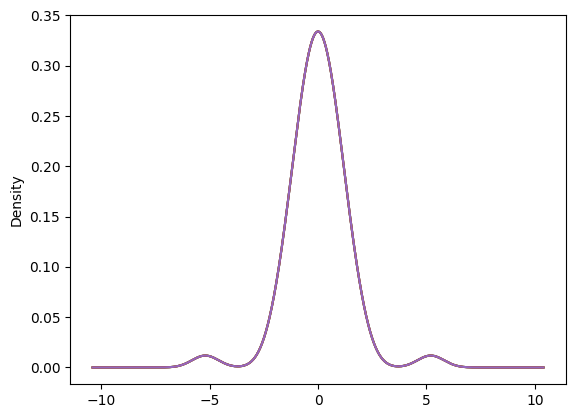

In [ ]:
# Plot the count for some features
q_negedia_df['ENSG00000251562'].plot(kind='kde')
q_negedia_df['ENSG00000198886'].plot(kind='kde')
q_negedia_df['ENSG00000169710'].plot(kind='kde')
q_negedia_df['ENSG00000198938'].plot(kind='kde')
q_negedia_df['ENSG00000111341'].plot(kind='kde')

# Distributions are brought to be all gaussians.

In [ ]:
# Execute PCA. First, determine number of components to explain 99% of the variance
pca_variance_cutoff = PCA(n_components=0.99, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(scaled_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.05579921 0.09549148 0.12823649 0.1591016  0.18870819 0.21399276
 0.23851432 0.26222926 0.28528359 0.30794892 0.33048662 0.3515209
 0.37216238 0.39256427 0.41242007 0.43211043 0.4514975  0.47077125
 0.48976645 0.5085164  0.52705025 0.54515862 0.56315227 0.58098779
 0.5984784  0.61575572 0.63286366 0.64985687 0.66645458 0.68297786
 0.69925433 0.71499949 0.73038222 0.74552312 0.76048766 0.77534165
 0.79001535 0.80458453 0.81891072 0.83283514 0.8466715  0.86022461
 0.87347305 0.88659489 0.89950294 0.91233021 0.92485218 0.93688552
 0.94847493 0.95969728 0.97051149 0.98108549 0.99071874]
Number of components: 53
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000249231' 'ENSG00000254239' 'ENSG00000263089']


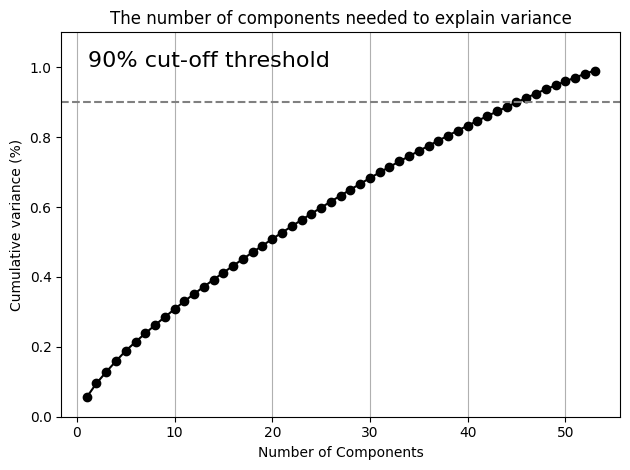

In [ ]:
# Interestingly enough, each component explains <= 5% of the variance. So each component is contributing in some part to the variance explaination.
# In practice, we need only 53 genes over 20867 to recognize a sample. But... if m = num comp and n = samples
# We have m ~ n... not very good
# We can see this by plotting the cumulative variance:

x, y = np.arange(1, pca_variance_cutoff.n_components_+1, step=1), pca_variance_cutoff.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots()
plt.ylim(0.0,1.1)
plt.plot(x,y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='grey', linestyle='--')
plt.text(1.1, 1, '90% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.show()

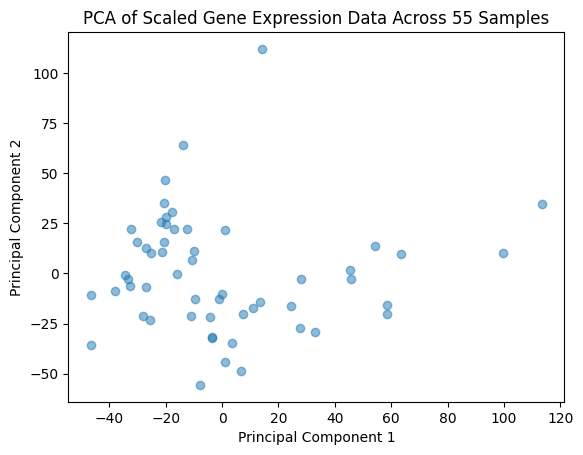

In [ ]:
# We can visualise the result for the first two components, expected result is that they are not grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# What if we use the robust?
pca_variance_cutoff = PCA(n_components=0.99, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(rscaled_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.96021735 0.97107455 0.97679853 0.98142925 0.9830644  0.98460195
 0.98557664 0.98654686 0.98743437 0.9882873  0.98903459 0.9897638
 0.9904533 ]
Number of components: 13
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000249231' 'ENSG00000254239' 'ENSG00000263089']


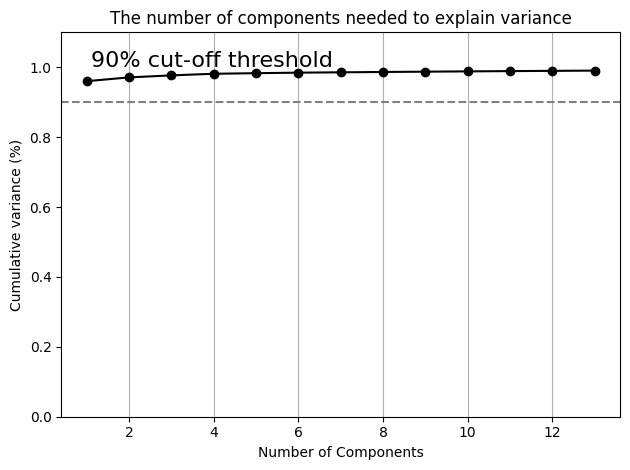

In [ ]:
# Interestingly enough, first component explains 96% of the variance. And only the first one is very important. Seems not very good either.

x, y = np.arange(1, pca_variance_cutoff.n_components_+1, step=1), pca_variance_cutoff.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots()
plt.ylim(0.0,1.1)
plt.plot(x,y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='grey', linestyle='--')
plt.text(1.1, 1, '90% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.show()

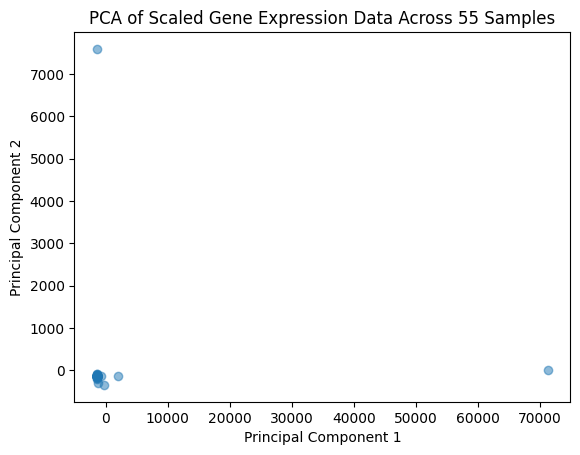

In [ ]:
# We can visualise the result for the first two components, expected result is that they are grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# What if we use the quantile
pca_variance_cutoff = PCA(n_components=0.99, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(q_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.05197818 0.09054513 0.12047421 0.14944288 0.17559504 0.1991495
 0.22189064 0.24413161 0.26516098 0.28612259 0.30636403 0.32639554
 0.34604024 0.3655736  0.38475748 0.40376368 0.42258238 0.44127279
 0.4598191  0.47810901 0.49628069 0.51394409 0.53145001 0.54884485
 0.56600485 0.58301854 0.60001227 0.61685195 0.63351794 0.65005175
 0.66654773 0.68279138 0.69885363 0.714794   0.73055149 0.74617413
 0.76168566 0.77714608 0.79237387 0.80745004 0.82241601 0.83728879
 0.85199229 0.86650004 0.88073261 0.89472712 0.90858006 0.92227137
 0.93589683 0.94919494 0.96245968 0.97525976 0.98767089 1.        ]
Number of components: 54
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000249231' 'ENSG00000254239' 'ENSG00000263089']


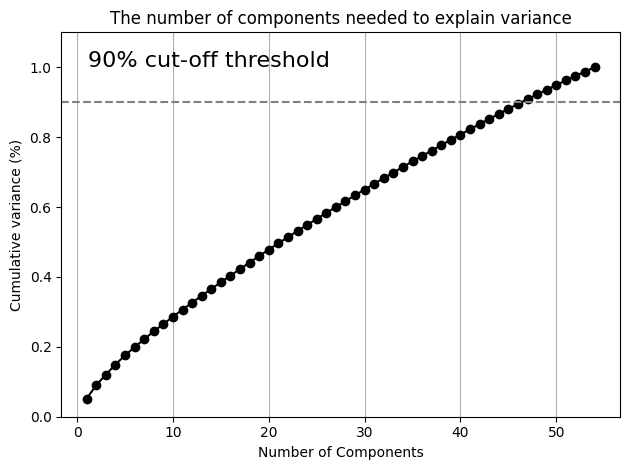

In [ ]:
# Again, we need 54 components. It seems this performs simarly to z-score. Very badly.

x, y = np.arange(1, pca_variance_cutoff.n_components_+1, step=1), pca_variance_cutoff.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots()
plt.ylim(0.0,1.1)
plt.plot(x,y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='grey', linestyle='--')
plt.text(1.1, 1, '90% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.show()

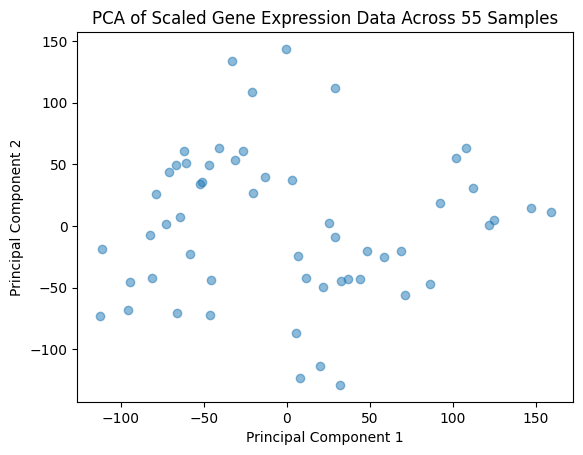

In [ ]:
# We can visualise the result for the first two components, expected result is that they are not grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Conclusion: in my view, StandardScaler and QuantileTransformation worked ok, giving good dimensionality reduction.
# Result of robust scaler instead doesn't make sense...

In [ ]:
# What if we try to remove "sparse" genes? We see there are a lot of genes whose importance is visible only for some samples.
# We can remove them based on this rule: if the gene is != 0 for P >= M * 0.7, then we drop

threshold = 0.7 * len(negedia_df)
removed_columns = [col for col in negedia_df if (negedia_df[col] == 0).sum() > threshold]
reduced_negedia_df = negedia_df.drop(columns=removed_columns)
print("Columns removed: {0}".format(len(removed_columns)))
reduced_negedia_df

Columns removed: 7551


GeneID,ENSG00000251562,ENSG00000108821,ENSG00000198886,ENSG00000198938,ENSG00000106211,ENSG00000198763,ENSG00000142156,ENSG00000198899,ENSG00000198840,ENSG00000245532,...,ENSG00000142494,ENSG00000205795,ENSG00000176401,ENSG00000160207,ENSG00000169900,ENSG00000109743,ENSG00000223797,ENSG00000144712,ENSG00000183091,ENSG00000246334
NEGEDIA_56,55187.0,36683.0,36553.0,20438.0,19664.0,18867.0,15955.0,15560.0,14928.0,13990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_73,34883.0,50426.0,30238.0,31822.0,24785.0,21016.0,20231.0,15191.0,18273.0,8959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_71,51715.0,21176.0,55815.0,28630.0,7041.0,39239.0,6253.0,28860.0,21627.0,12549.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_10,32494.0,23175.0,75726.0,46739.0,10654.0,41058.0,7025.0,38349.0,27365.0,7942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_43,41204.0,7421.0,30274.0,24857.0,7071.0,22376.0,4188.0,9501.0,6556.0,9886.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_40,156285.0,4846.0,51677.0,41094.0,37421.0,22761.0,1693.0,40201.0,16813.0,20166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_12,58876.0,22644.0,42631.0,34782.0,27229.0,24180.0,7890.0,18440.0,16940.0,14425.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_11,68222.0,31305.0,108634.0,67820.0,11300.0,105914.0,5995.0,56516.0,34040.0,27516.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_55,71038.0,2138.0,75175.0,73726.0,23511.0,41786.0,2125.0,47758.0,34584.0,32691.0,...,0.0,50.0,27.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
NEGEDIA_29,84514.0,50689.0,47195.0,36942.0,13777.0,34838.0,17413.0,33506.0,17020.0,32970.0,...,0.0,62.0,0.0,0.0,27.0,26.0,16.0,13.0,0.0,0.0


In [ ]:
# See how the standard scaler performs now
ss_r = StandardScaler()
scaled_reduced_negedia_df = pd.DataFrame(ss_r.fit_transform(reduced_negedia_df), index=reduced_negedia_df.index, columns=reduced_negedia_df.columns)
pca_variance_cutoff = PCA(n_components=0.99, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(scaled_reduced_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.07213876 0.12134011 0.15983079 0.19569236 0.22743889 0.25609783
 0.2831506  0.30887813 0.33321387 0.35732733 0.38029611 0.4019011
 0.42267383 0.44317362 0.46316186 0.48288876 0.50193352 0.52054571
 0.53894997 0.55678836 0.57447831 0.59194185 0.60884864 0.62544635
 0.64170637 0.65771465 0.67354822 0.68929225 0.70471493 0.71976927
 0.7348111  0.74964804 0.7641453  0.77835654 0.7923765  0.8062692
 0.81979374 0.83294551 0.84563079 0.85819714 0.8706445  0.882592
 0.89417653 0.90569562 0.91685288 0.9276995  0.93837666 0.94800099
 0.95749458 0.96682076 0.97550981 0.98402272 0.99225227]
Number of components: 53
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000144712' 'ENSG00000183091' 'ENSG00000246334']


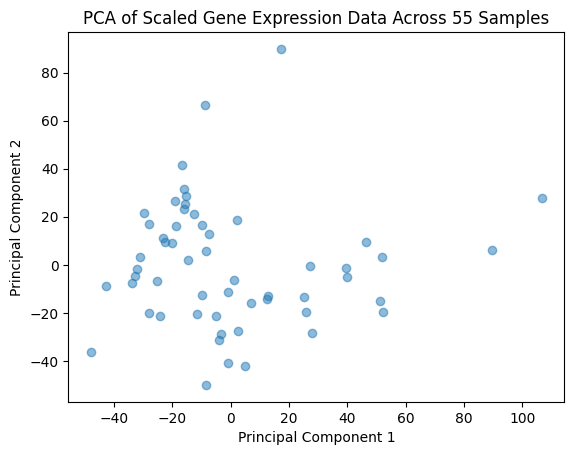

In [ ]:
# We can visualise the result for the first two components, expected result is that they are not grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# And the robust?
rs_r = RobustScaler()
rscaled_reduced_negedia_df = pd.DataFrame(rs_r.fit_transform(reduced_negedia_df), index=reduced_negedia_df.index, columns=reduced_negedia_df.columns)
pca_variance_cutoff = PCA(n_components=0.99, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(rscaled_reduced_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.78260095 0.8628834  0.8730354  0.88162278 0.89006856 0.89767259
 0.9047945  0.90993219 0.91464469 0.91882196 0.92255747 0.92613733
 0.92931071 0.93233205 0.93523283 0.93805354 0.94078136 0.94346
 0.94607125 0.94857137 0.95092949 0.95317749 0.95538933 0.95757687
 0.95967377 0.96170408 0.96369597 0.96563857 0.96755007 0.96939446
 0.97120099 0.9729738  0.97466678 0.97630496 0.97791139 0.97948816
 0.98100723 0.98249605 0.98392395 0.98531928 0.98666252 0.98793191
 0.98919422 0.99042835]
Number of components: 44
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000144712' 'ENSG00000183091' 'ENSG00000246334']


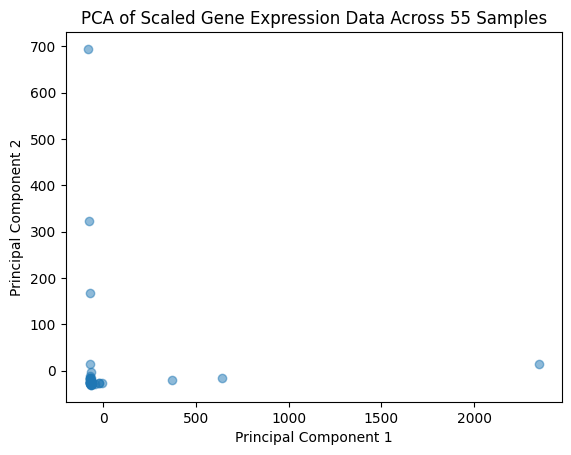

In [ ]:
# We can visualise the result for the first two components, expected result is that they are grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Let's use the robust scaler without the feature exclusion, using 2 components n
pca_variance_cutoff = PCA(n_components=2, svd_solver='full')
pca_data = pca_variance_cutoff.fit_transform(rscaled_negedia_df)
print(pca_variance_cutoff.explained_variance_ratio_.cumsum())
print("Number of components: {0}".format(pca_variance_cutoff.n_components_))
print("Genes which are assumed to be important: {0}".format(pca_variance_cutoff.feature_names_in_))

[0.96021735 0.97107455]
Number of components: 2
Genes which are assumed to be important: ['ENSG00000251562' 'ENSG00000108821' 'ENSG00000198886' ...
 'ENSG00000249231' 'ENSG00000254239' 'ENSG00000263089']


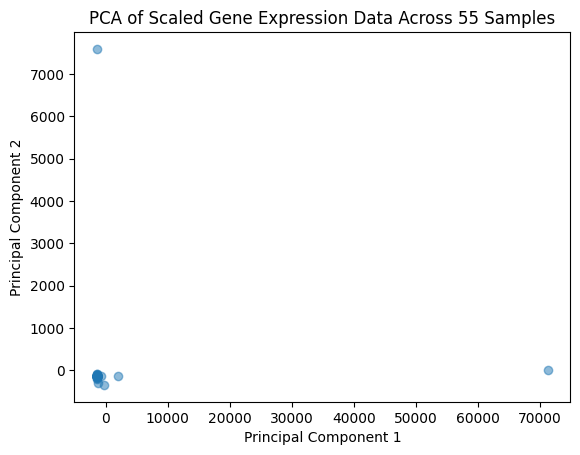

In [ ]:
# We can visualise the result for the first two components, expected result is that they are grouped.
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

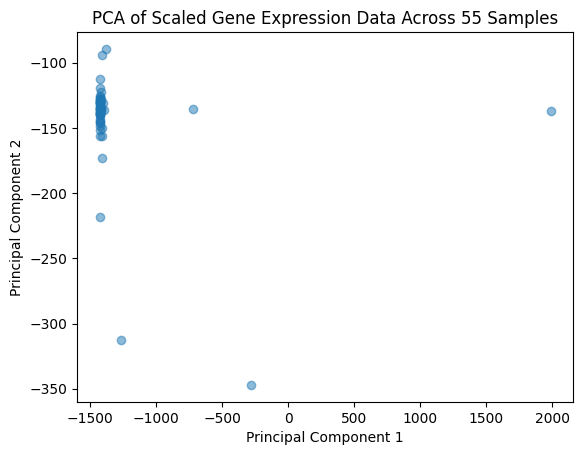

In [ ]:
# Try to remove outliers
clear_pca_data = pca_data[(pca_data[:, 0] <= 70000) & (pca_data[:, 1] <= 7000)]
plt.scatter(clear_pca_data[:, 0], clear_pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Exercise 2: spline
# Since we need to train the spline model and evaluate it through a Kfold, we should apply PCA on each train
# Define n-knots + degree to be less than 20

def get_scaler(pr):
  if pr == "rob":
    return RobustScaler()
  elif pr == "std":
    return StandardScaler()
  elif pr == "quantile":
    return QuantileTransformer()
  # elif pr == "pw":
  #   return PowerTransformer(method='yeo-johnson')
  elif pr == "complex":
    return make_pipeline(FunctionTransformer(lambda x: np.log(x+1)), StandardScaler())
  else:
    return None

def get_regressor(pr):
  if pr == "linear":
    return LinearRegression()
  elif pr == "ridge":
    return Ridge(alpha=1e-3) # Should be tuned but...

scalers = ["rob", "std", "complex", "quantile"]
regressors = ["linear", "ridge"]
parameters = [{'scaler': c,'n_knots': a, 'degree': b, 'regressor': d} for a,b,c,d in product(np.arange(2, 10), np.arange(1, 10), scalers, regressors) if a+b <= 20]

# Define folds
folds = 5

In [ ]:
def cross_validate_spline(df, scaler, regressor, n_folds, n_knots, degree):
    fold_size = len(df) // n_folds
    mse_scores = []

    for fold in range(n_folds):
        # Create indices for the train and validation sets
        val_indices = list(range(fold * fold_size, (fold + 1) * fold_size))
        train_indices = [i for i in range(len(df)) if i not in val_indices]

        # Apply RobustScaler and PCA
        pca = PCA(n_components=2, svd_solver='full')
        rs = get_scaler(scaler)

        # Split the data
        train_df = df.iloc[train_indices]
        val_df = df.iloc[val_indices]

        rs_train_data = rs.fit_transform(train_df) if rs else train_df
        pca_train_data = pca.fit_transform(rs_train_data)
        x = pca_train_data[:, 0]
        y = pca_train_data[:, 1]

        # Train the spline model
        spline_transformer = SplineTransformer(n_knots=n_knots, degree=degree, include_bias=False)
        linear_regressor = get_regressor(regressor)
        x_tr = spline_transformer.fit_transform(x.reshape(-1, 1))
        linear_regressor.fit(x_tr, y)

        # Evaluate the model
        rs_val_data = rs.transform(val_df) if rs else val_df
        pca_val_data = pca.transform(rs_val_data)
        x = pca_val_data[:, 0]
        y = pca_val_data[:, 1]

        x_val_tr = spline_transformer.transform(x.reshape(-1, 1))
        y_pred = linear_regressor.predict(x_val_tr)
        mse = mean_squared_error(y, y_pred)
        mse_scores.append(mse)

    return np.mean(mse_scores)

In [ ]:
best_mse = float('inf')
best_params = None

for parameter in parameters:
  mse = cross_validate_spline(reduced_negedia_df, n_folds=folds, **parameter)
  print("Parameters: {0}, Mse: {1}".format(parameter, mse))
  if mse < best_mse:
    best_mse = mse
    best_params = parameter

print("Ended.\n\nBest Parameters: {0}, Best mse: {1}".format(best_params, best_mse))

Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 1, 'regressor': 'linear'}, Mse: 3478.42690125066
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 1, 'regressor': 'ridge'}, Mse: 3478.42690125066
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 1, 'regressor': 'linear'}, Mse: 320.1074236417716
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 1, 'regressor': 'ridge'}, Mse: 320.1074236417716
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 1, 'regressor': 'linear'}, Mse: 360.085134492046
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 1, 'regressor': 'ridge'}, Mse: 360.085134492046


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 1, 'regressor': 'linear'}, Mse: 35.392715147220244


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 1, 'regressor': 'ridge'}, Mse: 35.392715147220244
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 2, 'regressor': 'linear'}, Mse: 3395.8870296367777
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 2, 'regressor': 'ridge'}, Mse: 3390.1553437923226
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 2, 'regressor': 'linear'}, Mse: 317.342579918535
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 2, 'regressor': 'ridge'}, Mse: 317.2994934773289
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 2, 'regressor': 'linear'}, Mse: 374.82996379982296
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 2, 'regressor': 'ridge'}, Mse: 374.57232318363924


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 2, 'regressor': 'linear'}, Mse: 38.57595454081148


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 2, 'regressor': 'ridge'}, Mse: 38.55896867755631
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 3, 'regressor': 'linear'}, Mse: 27420.554015927795
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 3, 'regressor': 'ridge'}, Mse: 3288.5753671297766
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 3, 'regressor': 'linear'}, Mse: 305.3636260259507
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 3, 'regressor': 'ridge'}, Mse: 309.2259691157724
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 3, 'regressor': 'linear'}, Mse: 373.28600395463195
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 3, 'regressor': 'ridge'}, Mse: 371.62305431731556


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 3, 'regressor': 'linear'}, Mse: 39.78613229640389


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 3, 'regressor': 'ridge'}, Mse: 37.919758151286956
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 4, 'regressor': 'linear'}, Mse: 173577902.5695951
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 4, 'regressor': 'ridge'}, Mse: 3370.8571881114535
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 4, 'regressor': 'linear'}, Mse: 322.2416905184321
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 4, 'regressor': 'ridge'}, Mse: 313.6473128869786
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 4, 'regressor': 'linear'}, Mse: 378.8041736477188
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 4, 'regressor': 'ridge'}, Mse: 373.0157872670513


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 4, 'regressor': 'linear'}, Mse: 42.308040922708436


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 4, 'regressor': 'ridge'}, Mse: 38.05933674497614
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 5, 'regressor': 'linear'}, Mse: 158378199289.28055
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 5, 'regressor': 'ridge'}, Mse: 3320.9872240131845
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 5, 'regressor': 'linear'}, Mse: 340.71425320803957
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 5, 'regressor': 'ridge'}, Mse: 307.1102915086416
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 5, 'regressor': 'linear'}, Mse: 378.0427292668487
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 5, 'regressor': 'ridge'}, Mse: 370.4072271042403


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 5, 'regressor': 'linear'}, Mse: 41.53476847861045


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 5, 'regressor': 'ridge'}, Mse: 37.626743126894574
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 6, 'regressor': 'linear'}, Mse: 99275859921478.3
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 6, 'regressor': 'ridge'}, Mse: 3359.2352761753145
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 6, 'regressor': 'linear'}, Mse: 377.7955344542777
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 6, 'regressor': 'ridge'}, Mse: 312.04310240411644
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 6, 'regressor': 'linear'}, Mse: 395.75060339958617
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 6, 'regressor': 'ridge'}, Mse: 371.6772032163567


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 6, 'regressor': 'linear'}, Mse: 46.703923298255425


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 6, 'regressor': 'ridge'}, Mse: 37.85908259268005
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 7, 'regressor': 'linear'}, Mse: 7.166565872582994e+16
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 7, 'regressor': 'ridge'}, Mse: 3350.537605098478
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 7, 'regressor': 'linear'}, Mse: 408.8037203936631
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 7, 'regressor': 'ridge'}, Mse: 311.063904166325
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 7, 'regressor': 'linear'}, Mse: 398.59084261753117
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 7, 'regressor': 'ridge'}, Mse: 370.7371164110443


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 7, 'regressor': 'linear'}, Mse: 45.51876235075388


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 7, 'regressor': 'ridge'}, Mse: 37.66127208217644
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 8, 'regressor': 'linear'}, Mse: 6.159403555357365e+16
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 8, 'regressor': 'ridge'}, Mse: 3360.29296835892
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 8, 'regressor': 'linear'}, Mse: 418.7421578707842
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 8, 'regressor': 'ridge'}, Mse: 313.4808939165042
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 8, 'regressor': 'linear'}, Mse: 430.75543720317484
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 8, 'regressor': 'ridge'}, Mse: 371.11906786436367


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 8, 'regressor': 'linear'}, Mse: 50.040771445928776


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 8, 'regressor': 'ridge'}, Mse: 37.93548073473621
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 9, 'regressor': 'linear'}, Mse: 9.850401987293222e+16
Parameters: {'scaler': 'rob', 'n_knots': 2, 'degree': 9, 'regressor': 'ridge'}, Mse: 3360.825612147971
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 9, 'regressor': 'linear'}, Mse: 462.1362269975225
Parameters: {'scaler': 'std', 'n_knots': 2, 'degree': 9, 'regressor': 'ridge'}, Mse: 313.7186749124386
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 9, 'regressor': 'linear'}, Mse: 444.63317497044136
Parameters: {'scaler': 'complex', 'n_knots': 2, 'degree': 9, 'regressor': 'ridge'}, Mse: 370.5146546920665


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 9, 'regressor': 'linear'}, Mse: 53.01386522459046


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 9, 'regressor': 'ridge'}, Mse: 37.90757489392935
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 1, 'regressor': 'linear'}, Mse: 3444.424626494735
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 1, 'regressor': 'ridge'}, Mse: 3443.2172443626287
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 1, 'regressor': 'linear'}, Mse: 311.3777452612707
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 1, 'regressor': 'ridge'}, Mse: 311.37454973153933
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 1, 'regressor': 'linear'}, Mse: 371.8768244016399
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 1, 'regressor': 'ridge'}, Mse: 371.857597416741


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 1, 'regressor': 'linear'}, Mse: 41.10534941583711


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 1, 'regressor': 'ridge'}, Mse: 41.102962342690475
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 2, 'regressor': 'linear'}, Mse: 43450.23650034414
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 2, 'regressor': 'ridge'}, Mse: 3479.227457629793
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 2, 'regressor': 'linear'}, Mse: 308.72731055067294
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 2, 'regressor': 'ridge'}, Mse: 308.76406721118383
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 2, 'regressor': 'linear'}, Mse: 372.04096461995107
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 2, 'regressor': 'ridge'}, Mse: 371.830214109047


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 2, 'regressor': 'linear'}, Mse: 39.33483339560043


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 2, 'regressor': 'ridge'}, Mse: 39.281862618596094
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 3, 'regressor': 'linear'}, Mse: 322694528.69722474
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 3, 'regressor': 'ridge'}, Mse: 4109.940895581307
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 3, 'regressor': 'linear'}, Mse: 322.8005729577325
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 3, 'regressor': 'ridge'}, Mse: 318.5650647655087
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 3, 'regressor': 'linear'}, Mse: 379.8255432645192
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 3, 'regressor': 'ridge'}, Mse: 378.1595533209192


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 3, 'regressor': 'linear'}, Mse: 43.69541215867059


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 3, 'regressor': 'ridge'}, Mse: 42.584801517661944
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 4, 'regressor': 'linear'}, Mse: 309907312357.0107
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 4, 'regressor': 'ridge'}, Mse: 3474.6205096300814
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 4, 'regressor': 'linear'}, Mse: 343.2077344515459
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 4, 'regressor': 'ridge'}, Mse: 308.34966030147467
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 4, 'regressor': 'linear'}, Mse: 379.032815183023
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 4, 'regressor': 'ridge'}, Mse: 371.9385576900787


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 4, 'regressor': 'linear'}, Mse: 41.48666579236549


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 4, 'regressor': 'ridge'}, Mse: 39.848150633927716
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 5, 'regressor': 'linear'}, Mse: 197323615219583.06
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 5, 'regressor': 'ridge'}, Mse: 3328.2500590314075
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 5, 'regressor': 'linear'}, Mse: 377.4101789713974
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 5, 'regressor': 'ridge'}, Mse: 316.4329325863305
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 5, 'regressor': 'linear'}, Mse: 396.84780682873145
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 5, 'regressor': 'ridge'}, Mse: 376.62081278511994


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 5, 'regressor': 'linear'}, Mse: 47.39143144133755


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 5, 'regressor': 'ridge'}, Mse: 41.738234184329244
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 6, 'regressor': 'linear'}, Mse: 1.6327136667982074e+17
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 6, 'regressor': 'ridge'}, Mse: 3220.2699886662367
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 6, 'regressor': 'linear'}, Mse: 405.9333700753353
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 6, 'regressor': 'ridge'}, Mse: 309.4150396519031
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 6, 'regressor': 'linear'}, Mse: 401.9559864911652
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 6, 'regressor': 'ridge'}, Mse: 372.53542592250085


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 6, 'regressor': 'linear'}, Mse: 45.6386563324435


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 6, 'regressor': 'ridge'}, Mse: 39.82111370314828
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 7, 'regressor': 'linear'}, Mse: 6.1514201999796584e+16
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 7, 'regressor': 'ridge'}, Mse: 3200.720867377069
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 7, 'regressor': 'linear'}, Mse: 421.5659347880954
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 7, 'regressor': 'ridge'}, Mse: 310.96082982916835
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 7, 'regressor': 'linear'}, Mse: 435.5988414270602
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 7, 'regressor': 'ridge'}, Mse: 373.97571365441684


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 7, 'regressor': 'linear'}, Mse: 50.449015681574


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 7, 'regressor': 'ridge'}, Mse: 40.275896307455085
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 8, 'regressor': 'linear'}, Mse: 7.944783951792927e+20
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 8, 'regressor': 'ridge'}, Mse: 3203.228456638716
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 8, 'regressor': 'linear'}, Mse: 456.4464082469414
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 8, 'regressor': 'ridge'}, Mse: 307.9166673698005
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 8, 'regressor': 'linear'}, Mse: 439.3435298342014
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 8, 'regressor': 'ridge'}, Mse: 371.97485950631216


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 8, 'regressor': 'linear'}, Mse: 53.50398119077549


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 8, 'regressor': 'ridge'}, Mse: 39.41332345885233
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 9, 'regressor': 'linear'}, Mse: 5.160339578889418e+20
Parameters: {'scaler': 'rob', 'n_knots': 3, 'degree': 9, 'regressor': 'ridge'}, Mse: 3216.643626093222
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 9, 'regressor': 'linear'}, Mse: 494.06782238361404
Parameters: {'scaler': 'std', 'n_knots': 3, 'degree': 9, 'regressor': 'ridge'}, Mse: 307.6904848554096
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 9, 'regressor': 'linear'}, Mse: 406.3049024639155
Parameters: {'scaler': 'complex', 'n_knots': 3, 'degree': 9, 'regressor': 'ridge'}, Mse: 372.0358220166097


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 9, 'regressor': 'linear'}, Mse: 58.33509427378184


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 3, 'degree': 9, 'regressor': 'ridge'}, Mse: 39.26698303451512
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 1, 'regressor': 'linear'}, Mse: 3195.6748809390374
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 1, 'regressor': 'ridge'}, Mse: 3196.7432870252674
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 1, 'regressor': 'linear'}, Mse: 319.26621524349275
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 1, 'regressor': 'ridge'}, Mse: 319.2789541826569
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 1, 'regressor': 'linear'}, Mse: 371.49678197841587
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 1, 'regressor': 'ridge'}, Mse: 371.4632788334011


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 1, 'regressor': 'linear'}, Mse: 39.031379966948684


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 1, 'regressor': 'ridge'}, Mse: 39.02599462307903
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 2, 'regressor': 'linear'}, Mse: 56514.25212100558
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 2, 'regressor': 'ridge'}, Mse: 23160.69023845649
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 2, 'regressor': 'linear'}, Mse: 325.64012012576916
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 2, 'regressor': 'ridge'}, Mse: 325.5587562811569
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 2, 'regressor': 'linear'}, Mse: 380.544753899217
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 2, 'regressor': 'ridge'}, Mse: 380.4461123014996


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 2, 'regressor': 'linear'}, Mse: 46.53013621902754


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 2, 'regressor': 'ridge'}, Mse: 46.49162247802144
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 3, 'regressor': 'linear'}, Mse: 301384377.0050607
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 3, 'regressor': 'ridge'}, Mse: 7359.443566371566
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 3, 'regressor': 'linear'}, Mse: 347.0839274649015
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 3, 'regressor': 'ridge'}, Mse: 335.85875635397673
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 3, 'regressor': 'linear'}, Mse: 377.3679986845732
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 3, 'regressor': 'ridge'}, Mse: 375.32161391502257


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 3, 'regressor': 'linear'}, Mse: 41.18175851101802


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 3, 'regressor': 'ridge'}, Mse: 40.8293805666395
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 4, 'regressor': 'linear'}, Mse: 304138786637.8534
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 4, 'regressor': 'ridge'}, Mse: 12105.937367172042
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 4, 'regressor': 'linear'}, Mse: 377.6388943351199
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 4, 'regressor': 'ridge'}, Mse: 328.49599164690125
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 4, 'regressor': 'linear'}, Mse: 394.7850950513075
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 4, 'regressor': 'ridge'}, Mse: 379.945845822927


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 4, 'regressor': 'linear'}, Mse: 47.775241743543674


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 4, 'regressor': 'ridge'}, Mse: 44.651855115495614
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 5, 'regressor': 'linear'}, Mse: 197484598085853.62
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 5, 'regressor': 'ridge'}, Mse: 6136.883467444828
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 5, 'regressor': 'linear'}, Mse: 407.5777372619691
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 5, 'regressor': 'ridge'}, Mse: 336.6210661153051
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 5, 'regressor': 'linear'}, Mse: 401.55685168600445
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 5, 'regressor': 'ridge'}, Mse: 377.240070185033


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 5, 'regressor': 'linear'}, Mse: 45.12237368274346


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 5, 'regressor': 'ridge'}, Mse: 41.80646799047579
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 6, 'regressor': 'linear'}, Mse: 1.6310137524384006e+17
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 6, 'regressor': 'ridge'}, Mse: 6031.3452398964555
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 6, 'regressor': 'linear'}, Mse: 423.34958085364195
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 6, 'regressor': 'ridge'}, Mse: 327.6862434265581
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 6, 'regressor': 'linear'}, Mse: 437.27672743987205
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 6, 'regressor': 'ridge'}, Mse: 378.79612067827225


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 6, 'regressor': 'linear'}, Mse: 50.271998884573506


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 6, 'regressor': 'ridge'}, Mse: 43.50714975395211
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 7, 'regressor': 'linear'}, Mse: 1.4060771127395672e+21
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 7, 'regressor': 'ridge'}, Mse: 4482.766512524415
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 7, 'regressor': 'linear'}, Mse: 454.50873982611085
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 7, 'regressor': 'ridge'}, Mse: 327.5834392530659
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 7, 'regressor': 'linear'}, Mse: 437.489914983781
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 7, 'regressor': 'ridge'}, Mse: 376.26392309650186


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 7, 'regressor': 'linear'}, Mse: 52.81136454315682


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 7, 'regressor': 'ridge'}, Mse: 41.82576787014066
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 8, 'regressor': 'linear'}, Mse: 5.4810150805461546e+20
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 8, 'regressor': 'ridge'}, Mse: 4083.382600214376
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 8, 'regressor': 'linear'}, Mse: 491.25208300489214
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 8, 'regressor': 'ridge'}, Mse: 322.87899322774
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 8, 'regressor': 'linear'}, Mse: 410.3386337218664
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 8, 'regressor': 'ridge'}, Mse: 377.33023158281765


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 8, 'regressor': 'linear'}, Mse: 58.01402335594461


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 8, 'regressor': 'ridge'}, Mse: 42.56110105724705
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 9, 'regressor': 'linear'}, Mse: 6.606020474399418e+20
Parameters: {'scaler': 'rob', 'n_knots': 4, 'degree': 9, 'regressor': 'ridge'}, Mse: 3659.0896958937615
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 9, 'regressor': 'linear'}, Mse: 513.6363782461041
Parameters: {'scaler': 'std', 'n_knots': 4, 'degree': 9, 'regressor': 'ridge'}, Mse: 320.60954985102023
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 9, 'regressor': 'linear'}, Mse: 423.6542212633455
Parameters: {'scaler': 'complex', 'n_knots': 4, 'degree': 9, 'regressor': 'ridge'}, Mse: 375.7437584826814


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 9, 'regressor': 'linear'}, Mse: 65.23487009094598


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 4, 'degree': 9, 'regressor': 'ridge'}, Mse: 41.638080800812475
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 1, 'regressor': 'linear'}, Mse: 69601.71620327237
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 1, 'regressor': 'ridge'}, Mse: 19560.80068584125
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 1, 'regressor': 'linear'}, Mse: 331.61694860917174
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 1, 'regressor': 'ridge'}, Mse: 331.60577390107073
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 1, 'regressor': 'linear'}, Mse: 386.8235821563393
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 1, 'regressor': 'ridge'}, Mse: 386.80280140287533


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 1, 'regressor': 'linear'}, Mse: 50.373599514692614


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 1, 'regressor': 'ridge'}, Mse: 50.369649928640044
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 2, 'regressor': 'linear'}, Mse: 4.030254381636034e+29
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 2, 'regressor': 'ridge'}, Mse: 28743.576684706415
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 2, 'regressor': 'linear'}, Mse: 352.08034691258956
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 2, 'regressor': 'ridge'}, Mse: 351.6720887477729
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 2, 'regressor': 'linear'}, Mse: 382.0575343285535
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 2, 'regressor': 'ridge'}, Mse: 382.0642753541797


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 2, 'regressor': 'linear'}, Mse: 41.305108668557274


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 2, 'regressor': 'ridge'}, Mse: 41.28435421930541
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 3, 'regressor': 'linear'}, Mse: 1.8804306932356643e+27
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 3, 'regressor': 'ridge'}, Mse: 8706.238509395229
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 3, 'regressor': 'linear'}, Mse: 379.7649123149345
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 3, 'regressor': 'ridge'}, Mse: 370.722155714774
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 3, 'regressor': 'linear'}, Mse: 393.6470707373996
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 3, 'regressor': 'ridge'}, Mse: 389.30364878189863


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 3, 'regressor': 'linear'}, Mse: 48.66987486548801


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 3, 'regressor': 'ridge'}, Mse: 47.68613668557399
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 4, 'regressor': 'linear'}, Mse: 8.341854395405237e+19
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 4, 'regressor': 'ridge'}, Mse: 19231.864332867357
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 4, 'regressor': 'linear'}, Mse: 404.63389796353005
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 4, 'regressor': 'ridge'}, Mse: 356.97513521457904
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 4, 'regressor': 'linear'}, Mse: 404.62018314846534
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 4, 'regressor': 'ridge'}, Mse: 382.55846298659867


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 4, 'regressor': 'linear'}, Mse: 45.12463988455102


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 4, 'regressor': 'ridge'}, Mse: 43.55381301059516
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 5, 'regressor': 'linear'}, Mse: 2.6319295822503724e+16
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 5, 'regressor': 'ridge'}, Mse: 11163.912563383357
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 5, 'regressor': 'linear'}, Mse: 426.2826722996677
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 5, 'regressor': 'ridge'}, Mse: 373.7653303696256
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 5, 'regressor': 'linear'}, Mse: 438.86979284351264
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 5, 'regressor': 'ridge'}, Mse: 392.57576121702493


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 5, 'regressor': 'linear'}, Mse: 50.40542503982309


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 5, 'regressor': 'ridge'}, Mse: 47.800865868706786
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 6, 'regressor': 'linear'}, Mse: 1.9872703889063014e+17
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 6, 'regressor': 'ridge'}, Mse: 12412.277823565102
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 6, 'regressor': 'linear'}, Mse: 449.7110469092211
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 6, 'regressor': 'ridge'}, Mse: 356.3217417200805
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 6, 'regressor': 'linear'}, Mse: 431.4813799159806
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 6, 'regressor': 'ridge'}, Mse: 383.42068860432147


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 6, 'regressor': 'linear'}, Mse: 52.49325029594205


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 6, 'regressor': 'ridge'}, Mse: 44.28866808044164
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 7, 'regressor': 'linear'}, Mse: 1.7399180172681156e+21
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 7, 'regressor': 'ridge'}, Mse: 9213.963005128844
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 7, 'regressor': 'linear'}, Mse: 497.5304716801296
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 7, 'regressor': 'ridge'}, Mse: 361.6286336956363
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 7, 'regressor': 'linear'}, Mse: 409.9784900187832
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 7, 'regressor': 'ridge'}, Mse: 387.5177867553033


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 7, 'regressor': 'linear'}, Mse: 57.58235131787775


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 7, 'regressor': 'ridge'}, Mse: 46.230660999223055
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 8, 'regressor': 'linear'}, Mse: 1.2868570318458035e+21
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 8, 'regressor': 'ridge'}, Mse: 8303.187694974209
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 8, 'regressor': 'linear'}, Mse: 528.4959619623488
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 8, 'regressor': 'ridge'}, Mse: 348.1429903644768
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 8, 'regressor': 'linear'}, Mse: 428.0578051244488
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 8, 'regressor': 'ridge'}, Mse: 381.4313799133775


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 8, 'regressor': 'linear'}, Mse: 64.92674271292853


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 8, 'regressor': 'ridge'}, Mse: 43.904295874555444
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 9, 'regressor': 'linear'}, Mse: 1.8477549123559305e+22
Parameters: {'scaler': 'rob', 'n_knots': 5, 'degree': 9, 'regressor': 'ridge'}, Mse: 6821.233900141512
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 9, 'regressor': 'linear'}, Mse: 970.0822695013409
Parameters: {'scaler': 'std', 'n_knots': 5, 'degree': 9, 'regressor': 'ridge'}, Mse: 345.3685843578157
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 9, 'regressor': 'linear'}, Mse: 399.96582271584157
Parameters: {'scaler': 'complex', 'n_knots': 5, 'degree': 9, 'regressor': 'ridge'}, Mse: 381.7315625181467


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 9, 'regressor': 'linear'}, Mse: 65.81106117774725


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 5, 'degree': 9, 'regressor': 'ridge'}, Mse: 44.30471041109841
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 1, 'regressor': 'linear'}, Mse: 69592.67845076819
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 1, 'regressor': 'ridge'}, Mse: 60886.85887076184
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 1, 'regressor': 'linear'}, Mse: 352.6037526478578
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 1, 'regressor': 'ridge'}, Mse: 352.59182135720505
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 1, 'regressor': 'linear'}, Mse: 406.77343492566285
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 1, 'regressor': 'ridge'}, Mse: 406.7174955053719


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 1, 'regressor': 'linear'}, Mse: 43.35920758243613


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 1, 'regressor': 'ridge'}, Mse: 43.352896594200615
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 2, 'regressor': 'linear'}, Mse: 1.0188700708349498e+30
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 2, 'regressor': 'ridge'}, Mse: 14492.422948123532
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 2, 'regressor': 'linear'}, Mse: 393.9296814229181
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 2, 'regressor': 'ridge'}, Mse: 393.70464605948234
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 2, 'regressor': 'linear'}, Mse: 391.41740607918257
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 2, 'regressor': 'ridge'}, Mse: 391.61251437010816


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 2, 'regressor': 'linear'}, Mse: 50.55558271514102


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 2, 'regressor': 'ridge'}, Mse: 50.50500343276555
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 3, 'regressor': 'linear'}, Mse: 1.1744666871206918e+29
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 3, 'regressor': 'ridge'}, Mse: 4279.266493666876
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 3, 'regressor': 'linear'}, Mse: 396.5055476215231
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 3, 'regressor': 'ridge'}, Mse: 381.6280228139902
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 3, 'regressor': 'linear'}, Mse: 416.3184654467712
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 3, 'regressor': 'ridge'}, Mse: 403.13003385241234


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 3, 'regressor': 'linear'}, Mse: 46.43151809182853


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 3, 'regressor': 'ridge'}, Mse: 46.53894790681583
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 4, 'regressor': 'linear'}, Mse: 1.5201503745555892e+27
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 4, 'regressor': 'ridge'}, Mse: 15373.192592885718
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 4, 'regressor': 'linear'}, Mse: 434.34407881783517
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 4, 'regressor': 'ridge'}, Mse: 400.28739420810103
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 4, 'regressor': 'linear'}, Mse: 442.6553952551685
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 4, 'regressor': 'ridge'}, Mse: 397.5389253557121


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 4, 'regressor': 'linear'}, Mse: 51.15921784270974


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 4, 'regressor': 'ridge'}, Mse: 49.9156682968066
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 5, 'regressor': 'linear'}, Mse: 4.522725837925646e+16
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 5, 'regressor': 'ridge'}, Mse: 11912.137961139735
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 5, 'regressor': 'linear'}, Mse: 441.4888938839301
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 5, 'regressor': 'ridge'}, Mse: 387.1787136376755
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 5, 'regressor': 'linear'}, Mse: 422.8916737352121
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 5, 'regressor': 'ridge'}, Mse: 407.6754235173972


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 5, 'regressor': 'linear'}, Mse: 53.09780706323996


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 5, 'regressor': 'ridge'}, Mse: 47.69948828600023
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 6, 'regressor': 'linear'}, Mse: 6.654903319560993e+18
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 6, 'regressor': 'ridge'}, Mse: 14628.356738747378
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 6, 'regressor': 'linear'}, Mse: 517.0163923220869
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 6, 'regressor': 'ridge'}, Mse: 396.2983435205509
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 6, 'regressor': 'linear'}, Mse: 414.411245482486
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 6, 'regressor': 'ridge'}, Mse: 398.58371255080436


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 6, 'regressor': 'linear'}, Mse: 57.565783657943015


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 6, 'regressor': 'ridge'}, Mse: 49.38260767451802
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 7, 'regressor': 'linear'}, Mse: 1.5989799767888833e+21
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 7, 'regressor': 'ridge'}, Mse: 13023.997040880242
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 7, 'regressor': 'linear'}, Mse: 593.9397899357898
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 7, 'regressor': 'ridge'}, Mse: 381.1821512085988
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 7, 'regressor': 'linear'}, Mse: 434.88493961512705
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 7, 'regressor': 'ridge'}, Mse: 399.94844838030474


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 7, 'regressor': 'linear'}, Mse: 64.78338409464614


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 7, 'regressor': 'ridge'}, Mse: 47.7287568884772
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 8, 'regressor': 'linear'}, Mse: 1.1324045133135545e+26
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 8, 'regressor': 'ridge'}, Mse: 12552.702892140896
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 8, 'regressor': 'linear'}, Mse: 1333.0329434093587
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 8, 'regressor': 'ridge'}, Mse: 384.4394718969078
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 8, 'regressor': 'linear'}, Mse: 398.2559874867969
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 8, 'regressor': 'ridge'}, Mse: 395.99106761636494


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 8, 'regressor': 'linear'}, Mse: 65.82191679218103


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 8, 'regressor': 'ridge'}, Mse: 48.30020299103799
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 9, 'regressor': 'linear'}, Mse: 3.0519503227174435e+25
Parameters: {'scaler': 'rob', 'n_knots': 6, 'degree': 9, 'regressor': 'ridge'}, Mse: 11215.264804237017
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 9, 'regressor': 'linear'}, Mse: 1318.765941552995
Parameters: {'scaler': 'std', 'n_knots': 6, 'degree': 9, 'regressor': 'ridge'}, Mse: 372.12763846527525
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 9, 'regressor': 'linear'}, Mse: 427.4177017830551
Parameters: {'scaler': 'complex', 'n_knots': 6, 'degree': 9, 'regressor': 'ridge'}, Mse: 392.45538284079964


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 9, 'regressor': 'linear'}, Mse: 69.74544306786221


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 6, 'degree': 9, 'regressor': 'ridge'}, Mse: 46.95772128463791
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 1, 'regressor': 'linear'}, Mse: 530027.3599928101
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 1, 'regressor': 'ridge'}, Mse: 111916.89466399743
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 1, 'regressor': 'linear'}, Mse: 408.03579098414485
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 1, 'regressor': 'ridge'}, Mse: 408.01412660125413
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 1, 'regressor': 'linear'}, Mse: 379.9712467049129
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 1, 'regressor': 'ridge'}, Mse: 379.92481125285656


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 1, 'regressor': 'linear'}, Mse: 51.759532668878684


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 1, 'regressor': 'ridge'}, Mse: 51.7464245957943
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 2, 'regressor': 'linear'}, Mse: 157352277026.84537
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 2, 'regressor': 'ridge'}, Mse: 4923.902514652274
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 2, 'regressor': 'linear'}, Mse: 388.26637970634636
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 2, 'regressor': 'ridge'}, Mse: 388.52168529941775
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 2, 'regressor': 'linear'}, Mse: 429.1099347557059
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 2, 'regressor': 'ridge'}, Mse: 428.2415089870186


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 2, 'regressor': 'linear'}, Mse: 50.77255207276519


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 2, 'regressor': 'ridge'}, Mse: 50.74963039252059
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 3, 'regressor': 'linear'}, Mse: 3451986816906668.5
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 3, 'regressor': 'ridge'}, Mse: 10590.377692284617
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 3, 'regressor': 'linear'}, Mse: 438.13684576947196
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 3, 'regressor': 'ridge'}, Mse: 430.0611176602455
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 3, 'regressor': 'linear'}, Mse: 433.97717251164124
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 3, 'regressor': 'ridge'}, Mse: 392.73334549937147


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 3, 'regressor': 'linear'}, Mse: 52.30069460688153


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 3, 'regressor': 'ridge'}, Mse: 51.79924414025663
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 4, 'regressor': 'linear'}, Mse: 3.958204974855559e+19
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 4, 'regressor': 'ridge'}, Mse: 7315.707044545964
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 4, 'regressor': 'linear'}, Mse: 437.84275347517234
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 4, 'regressor': 'ridge'}, Mse: 404.32863537831963
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 4, 'regressor': 'linear'}, Mse: 416.22020981489794
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 4, 'regressor': 'ridge'}, Mse: 427.1086053408679


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 4, 'regressor': 'linear'}, Mse: 55.09575701558249


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 4, 'regressor': 'ridge'}, Mse: 51.16295995115872
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 5, 'regressor': 'linear'}, Mse: 6.57390217278031e+23
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 5, 'regressor': 'ridge'}, Mse: 7372.497053498123
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 5, 'regressor': 'linear'}, Mse: 767.2269251851683
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 5, 'regressor': 'ridge'}, Mse: 430.25569454543637
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 5, 'regressor': 'linear'}, Mse: 418.12835900682785
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 5, 'regressor': 'ridge'}, Mse: 407.41966257117457


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 5, 'regressor': 'linear'}, Mse: 57.855285359752216


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 5, 'regressor': 'ridge'}, Mse: 52.26197205559521
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 6, 'regressor': 'linear'}, Mse: 1.1168911168229274e+23
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 6, 'regressor': 'ridge'}, Mse: 11308.881114569076
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 6, 'regressor': 'linear'}, Mse: 932.2669949801866
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 6, 'regressor': 'ridge'}, Mse: 408.5354256552064
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 6, 'regressor': 'linear'}, Mse: 437.7075664100595
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 6, 'regressor': 'ridge'}, Mse: 422.56969254769785


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 6, 'regressor': 'linear'}, Mse: 64.68480572101839


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 6, 'regressor': 'ridge'}, Mse: 51.15581227408198
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 7, 'regressor': 'linear'}, Mse: 9.679609204191061e+21
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 7, 'regressor': 'ridge'}, Mse: 12346.28053722977
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 7, 'regressor': 'linear'}, Mse: 1213.3941083474638
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 7, 'regressor': 'ridge'}, Mse: 419.1316305775448
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 7, 'regressor': 'linear'}, Mse: 394.9973247622087
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 7, 'regressor': 'ridge'}, Mse: 406.1302531226084


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 7, 'regressor': 'linear'}, Mse: 65.72663711290338


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 7, 'regressor': 'ridge'}, Mse: 51.18293415967985
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 8, 'regressor': 'linear'}, Mse: 1.0874560624518093e+26
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 8, 'regressor': 'ridge'}, Mse: 13101.373523871021
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 8, 'regressor': 'linear'}, Mse: 558.2449409719152
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 8, 'regressor': 'ridge'}, Mse: 400.7228497604272
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 8, 'regressor': 'linear'}, Mse: 415.2141926360432
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 8, 'regressor': 'ridge'}, Mse: 413.0428746040322


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 8, 'regressor': 'linear'}, Mse: 69.94690156740441


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 8, 'regressor': 'ridge'}, Mse: 50.24388753749874
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 9, 'regressor': 'linear'}, Mse: 2.176756256313795e+25
Parameters: {'scaler': 'rob', 'n_knots': 7, 'degree': 9, 'regressor': 'ridge'}, Mse: 13122.339447058239
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 9, 'regressor': 'linear'}, Mse: 1795.5106718058717
Parameters: {'scaler': 'std', 'n_knots': 7, 'degree': 9, 'regressor': 'ridge'}, Mse: 401.96123206394105
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 9, 'regressor': 'linear'}, Mse: 457.0109939774596
Parameters: {'scaler': 'complex', 'n_knots': 7, 'degree': 9, 'regressor': 'ridge'}, Mse: 402.0723934883719


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 9, 'regressor': 'linear'}, Mse: 67.94919928292964


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 7, 'degree': 9, 'regressor': 'ridge'}, Mse: 49.57626316961186
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 1, 'regressor': 'linear'}, Mse: 73089.59560085382
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 1, 'regressor': 'ridge'}, Mse: 61057.12875865373
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 1, 'regressor': 'linear'}, Mse: 429.82858399618334
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 1, 'regressor': 'ridge'}, Mse: 429.5136424709347
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 1, 'regressor': 'linear'}, Mse: 449.4810534376649
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 1, 'regressor': 'ridge'}, Mse: 449.312259223975


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 1, 'regressor': 'linear'}, Mse: 62.54798423530001


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 1, 'regressor': 'ridge'}, Mse: 62.53065820215405
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 2, 'regressor': 'linear'}, Mse: 2.849547966829574e+24
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 2, 'regressor': 'ridge'}, Mse: 127048.33759693561
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 2, 'regressor': 'linear'}, Mse: 442.7471806108788
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 2, 'regressor': 'ridge'}, Mse: 430.3756695033915
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 2, 'regressor': 'linear'}, Mse: 425.24714146697323
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 2, 'regressor': 'ridge'}, Mse: 409.57587752518646


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 2, 'regressor': 'linear'}, Mse: 53.17964580385801


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 2, 'regressor': 'ridge'}, Mse: 53.15647569004453
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 3, 'regressor': 'linear'}, Mse: 3.438024175055311e+23
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 3, 'regressor': 'ridge'}, Mse: 34685.52357544152
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 3, 'regressor': 'linear'}, Mse: 457.6362925226531
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 3, 'regressor': 'ridge'}, Mse: 446.25938527970374
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 3, 'regressor': 'linear'}, Mse: 415.59885017167335
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 3, 'regressor': 'ridge'}, Mse: 435.46624702295713


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 3, 'regressor': 'linear'}, Mse: 59.670958941162226


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 3, 'regressor': 'ridge'}, Mse: 58.5196986604476
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 4, 'regressor': 'linear'}, Mse: 3.257568088379847e+18
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 4, 'regressor': 'ridge'}, Mse: 7266.69645793527
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 4, 'regressor': 'linear'}, Mse: 3223.8330803986546
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 4, 'regressor': 'ridge'}, Mse: 440.9875031993988
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 4, 'regressor': 'linear'}, Mse: 418.6403349336034
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 4, 'regressor': 'ridge'}, Mse: 430.7984821233214


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 4, 'regressor': 'linear'}, Mse: 58.22181840614691


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 4, 'regressor': 'ridge'}, Mse: 54.455567216454824
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 5, 'regressor': 'linear'}, Mse: 1.0359331012696985e+21
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 5, 'regressor': 'ridge'}, Mse: 3763.0393022563353
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 5, 'regressor': 'linear'}, Mse: 1198.793867386136
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 5, 'regressor': 'ridge'}, Mse: 456.90374969756687
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 5, 'regressor': 'linear'}, Mse: 437.97546966143443
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 5, 'regressor': 'ridge'}, Mse: 430.1977859834734


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 5, 'regressor': 'linear'}, Mse: 64.75418992624694


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 5, 'regressor': 'ridge'}, Mse: 58.497558269026875
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 6, 'regressor': 'linear'}, Mse: 5.1214333017270785e+25
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 6, 'regressor': 'ridge'}, Mse: 5693.491413072269
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 6, 'regressor': 'linear'}, Mse: 580.544401708565
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 6, 'regressor': 'ridge'}, Mse: 442.65150911780154
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 6, 'regressor': 'linear'}, Mse: 393.06609315924715
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 6, 'regressor': 'ridge'}, Mse: 426.75091732572326


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 6, 'regressor': 'linear'}, Mse: 65.45500674503023


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 6, 'regressor': 'ridge'}, Mse: 54.755702391767954
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 7, 'regressor': 'linear'}, Mse: 4.5296211124649746e+23
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 7, 'regressor': 'ridge'}, Mse: 8139.042509126256
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 7, 'regressor': 'linear'}, Mse: 1222.741116746439
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 7, 'regressor': 'ridge'}, Mse: 445.1214645822982
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 7, 'regressor': 'linear'}, Mse: 407.5930640509765
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 7, 'regressor': 'ridge'}, Mse: 426.0638581769216


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 7, 'regressor': 'linear'}, Mse: 70.62897109082569


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 7, 'regressor': 'ridge'}, Mse: 56.432973636021
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 8, 'regressor': 'linear'}, Mse: 9.30013152954007e+25
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 8, 'regressor': 'ridge'}, Mse: 9969.689829887644
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 8, 'regressor': 'linear'}, Mse: 1472.356579960186
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 8, 'regressor': 'ridge'}, Mse: 432.6846344382742
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 8, 'regressor': 'linear'}, Mse: 468.9935437043596
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 8, 'regressor': 'ridge'}, Mse: 419.558438919707


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 8, 'regressor': 'linear'}, Mse: 67.7533045930671


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 8, 'regressor': 'ridge'}, Mse: 53.54792680465719
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 9, 'regressor': 'linear'}, Mse: 3.804666408427525e+24
Parameters: {'scaler': 'rob', 'n_knots': 8, 'degree': 9, 'regressor': 'ridge'}, Mse: 11474.331981175133
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 9, 'regressor': 'linear'}, Mse: 1009.0763578061063
Parameters: {'scaler': 'std', 'n_knots': 8, 'degree': 9, 'regressor': 'ridge'}, Mse: 425.7630156590596
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 9, 'regressor': 'linear'}, Mse: 594.605562465593
Parameters: {'scaler': 'complex', 'n_knots': 8, 'degree': 9, 'regressor': 'ridge'}, Mse: 419.20115534905335


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 9, 'regressor': 'linear'}, Mse: 82.2015054988381


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 8, 'degree': 9, 'regressor': 'ridge'}, Mse: 53.36937577761993
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 1, 'regressor': 'linear'}, Mse: 15039.525958325516
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 1, 'regressor': 'ridge'}, Mse: 14506.563576886223
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 1, 'regressor': 'linear'}, Mse: 423.31780636942676
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 1, 'regressor': 'ridge'}, Mse: 423.4695898695998
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 1, 'regressor': 'linear'}, Mse: 419.37726886635585
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 1, 'regressor': 'ridge'}, Mse: 419.0752001277282


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 1, 'regressor': 'linear'}, Mse: 56.523237177012355


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 1, 'regressor': 'ridge'}, Mse: 56.50024659052524
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 2, 'regressor': 'linear'}, Mse: 1.9170165794620999e+27
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 2, 'regressor': 'ridge'}, Mse: 583763.7713048132
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 2, 'regressor': 'linear'}, Mse: 480.918515906645
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 2, 'regressor': 'ridge'}, Mse: 480.6567428295648
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 2, 'regressor': 'linear'}, Mse: 414.3971555035556
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 2, 'regressor': 'ridge'}, Mse: 428.7354222199134


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 2, 'regressor': 'linear'}, Mse: 63.80027313983394


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 2, 'regressor': 'ridge'}, Mse: 63.72705753166899
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 3, 'regressor': 'linear'}, Mse: 2.8548339950464886e+25
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 3, 'regressor': 'ridge'}, Mse: 52549.10071529477
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 3, 'regressor': 'linear'}, Mse: 459.89843760789256
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 3, 'regressor': 'ridge'}, Mse: 454.26213725303825
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 3, 'regressor': 'linear'}, Mse: 415.7225015354435
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 3, 'regressor': 'ridge'}, Mse: 427.52344013030233


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 3, 'regressor': 'linear'}, Mse: 58.82284610680216


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 3, 'regressor': 'ridge'}, Mse: 57.51018565942411
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 4, 'regressor': 'linear'}, Mse: 4.863030144140422e+24
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 4, 'regressor': 'ridge'}, Mse: 48947.37695650654
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 4, 'regressor': 'linear'}, Mse: 543.4436210513534
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 4, 'regressor': 'ridge'}, Mse: 484.1894438895964
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 4, 'regressor': 'linear'}, Mse: 432.8631020851215
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 4, 'regressor': 'ridge'}, Mse: 421.68057454038933


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 4, 'regressor': 'linear'}, Mse: 65.17141184667412


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 4, 'regressor': 'ridge'}, Mse: 63.244109840799126
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 5, 'regressor': 'linear'}, Mse: 5.5688626010533356e+19
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 5, 'regressor': 'ridge'}, Mse: 8429.327997579376
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 5, 'regressor': 'linear'}, Mse: 902.9762280538696
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 5, 'regressor': 'ridge'}, Mse: 469.78983553581185
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 5, 'regressor': 'linear'}, Mse: 394.0373493657741
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 5, 'regressor': 'ridge'}, Mse: 422.3390492607299


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 5, 'regressor': 'linear'}, Mse: 64.92683178043418


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 5, 'regressor': 'ridge'}, Mse: 59.14945851533099
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 6, 'regressor': 'linear'}, Mse: 2.6288927336331606e+24
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 6, 'regressor': 'ridge'}, Mse: 5053.699099742396
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 6, 'regressor': 'linear'}, Mse: 1307.1865189317714
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 6, 'regressor': 'ridge'}, Mse: 481.6404292383393
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 6, 'regressor': 'linear'}, Mse: 404.6009105625512
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 6, 'regressor': 'ridge'}, Mse: 420.46513626736817


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 6, 'regressor': 'linear'}, Mse: 72.02478447400648


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 6, 'regressor': 'ridge'}, Mse: 62.34380408932808
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 7, 'regressor': 'linear'}, Mse: 2.5718689345193655e+24
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 7, 'regressor': 'ridge'}, Mse: 4223.850369926055
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 7, 'regressor': 'linear'}, Mse: 735.3107299205737
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 7, 'regressor': 'ridge'}, Mse: 466.3103814555758
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 7, 'regressor': 'linear'}, Mse: 484.1919273638333
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 7, 'regressor': 'ridge'}, Mse: 421.73653858129376


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 7, 'regressor': 'linear'}, Mse: 67.84605649515353


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 7, 'regressor': 'ridge'}, Mse: 58.40511134075463
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 8, 'regressor': 'linear'}, Mse: 5.198290028772844e+25
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 8, 'regressor': 'ridge'}, Mse: 5544.821291668142
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 8, 'regressor': 'linear'}, Mse: 10523.097384882436
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 8, 'regressor': 'ridge'}, Mse: 467.03788901322923
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 8, 'regressor': 'linear'}, Mse: 544.4945970057819
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 8, 'regressor': 'ridge'}, Mse: 421.3166769729928


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 8, 'regressor': 'linear'}, Mse: 81.94712498313167


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 8, 'regressor': 'ridge'}, Mse: 59.84262945830314
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 9, 'regressor': 'linear'}, Mse: 3.453074822285907e+24
Parameters: {'scaler': 'rob', 'n_knots': 9, 'degree': 9, 'regressor': 'ridge'}, Mse: 7595.8335798906
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 9, 'regressor': 'linear'}, Mse: 154301.43657720927
Parameters: {'scaler': 'std', 'n_knots': 9, 'degree': 9, 'regressor': 'ridge'}, Mse: 451.2076514595342
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 9, 'regressor': 'linear'}, Mse: 661.7124775243349
Parameters: {'scaler': 'complex', 'n_knots': 9, 'degree': 9, 'regressor': 'ridge'}, Mse: 421.76059111232445


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 9, 'regressor': 'linear'}, Mse: 81.13632489967203


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (44). n_qua

Parameters: {'scaler': 'quantile', 'n_knots': 9, 'degree': 9, 'regressor': 'ridge'}, Mse: 56.388866332135095
Ended.

Best Parameters: {'scaler': 'quantile', 'n_knots': 2, 'degree': 1, 'regressor': 'linear'}, Best mse: 35.392715147220244


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (55). n_quantiles is set to n_samples.
  warnings.warn(


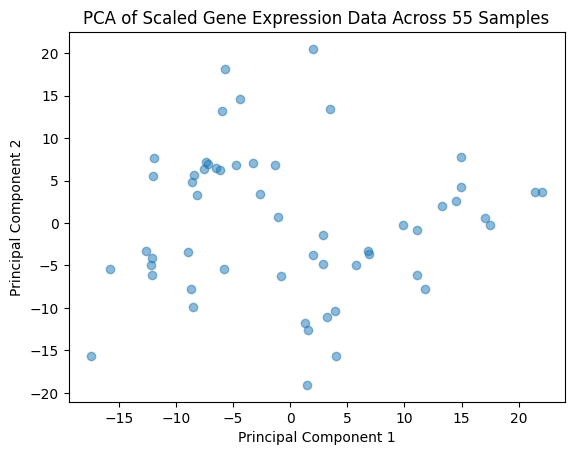

In [ ]:
# Visualize Fit and Spline

pca = PCA(n_components=2, svd_solver='full')
rs = get_scaler(best_params['scaler'])

transformed_data = rs.fit_transform(reduced_negedia_df)
pca_data = pca.fit_transform(transformed_data)
x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Scaled Gene Expression Data Across 55 Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
spline_transformer = SplineTransformer(n_knots=best_params['n_knots'], degree=best_params['degree'])
linear_regressor = get_regressor(best_params['regressor'])
x_tr = spline_transformer.fit_transform(x.reshape(-1, 1))
linear_regressor.fit(x_tr, y)

LinearRegression()

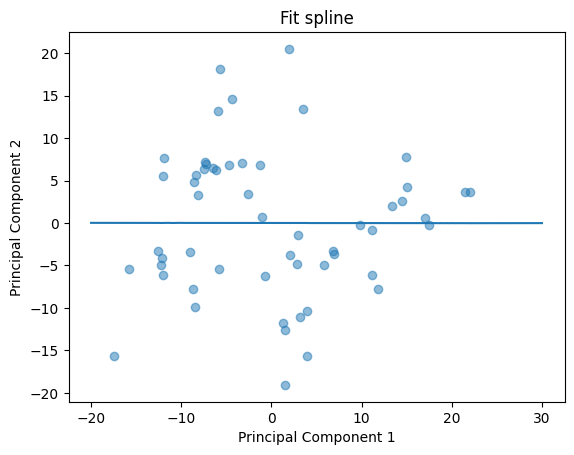

In [ ]:
x_plot = np.linspace(-20, 30, 200)
y_plot = linear_regressor.predict(spline_transformer.transform(x_plot.reshape(-1, 1)))

plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Fit spline')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot(x_plot, y_plot, label="B-spline")
plt.show()